# RPPA vs GEX

/var/folders/4s/5bktxlm15j156ybv0th415qh0000gn/T/ipykernel_63171/1562443999.py:52: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_1_values = pd.merge(sample_ids_df, df_1, how="left", on="sample_id")[columns].drop(columns=["sample_id"]).values
/var/folders/4s/5bktxlm15j156ybv0th415qh0000gn/T/ipykernel_63171/1562443999.py:53: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_2_values = pd.merge(sample_ids_df, df_2, how="left", on="sample_id")[columns].drop(columns=["sample_id"]).values


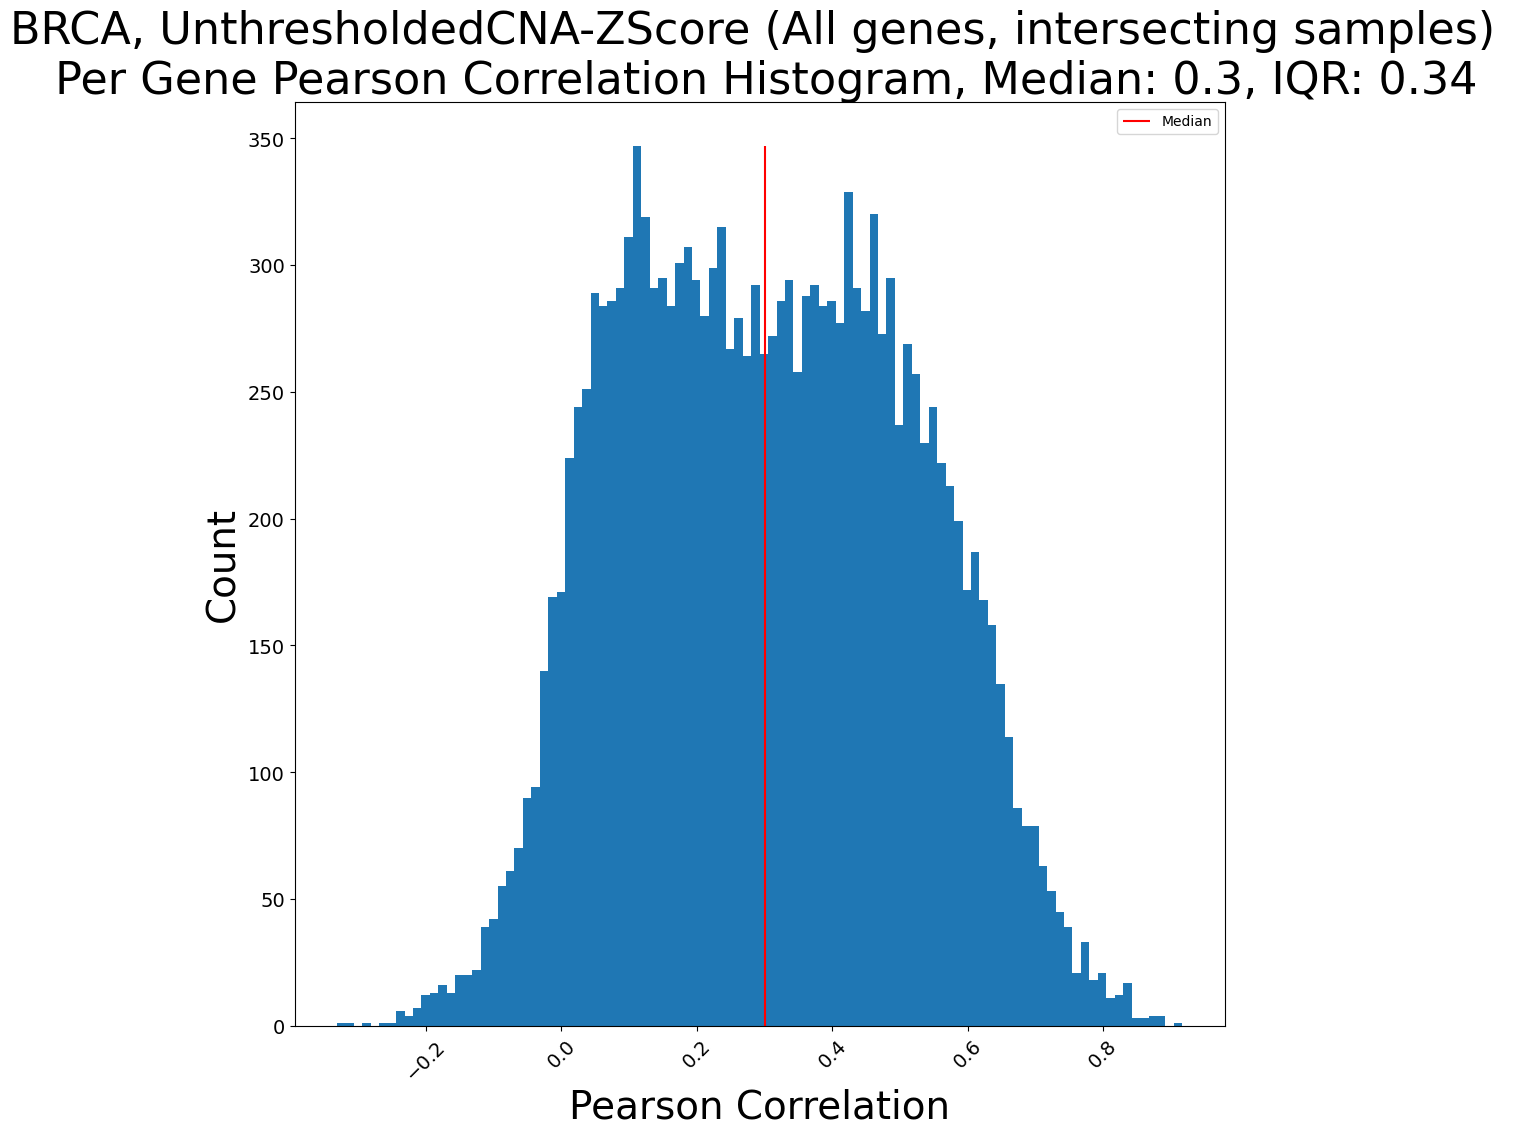

/var/folders/4s/5bktxlm15j156ybv0th415qh0000gn/T/ipykernel_63171/1562443999.py:52: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_1_values = pd.merge(sample_ids_df, df_1, how="left", on="sample_id")[columns].drop(columns=["sample_id"]).values
/var/folders/4s/5bktxlm15j156ybv0th415qh0000gn/T/ipykernel_63171/1562443999.py:53: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_2_values = pd.merge(sample_ids_df, df_2, how="left", on="sample_id")[columns].drop(columns=["sample_id"]).values


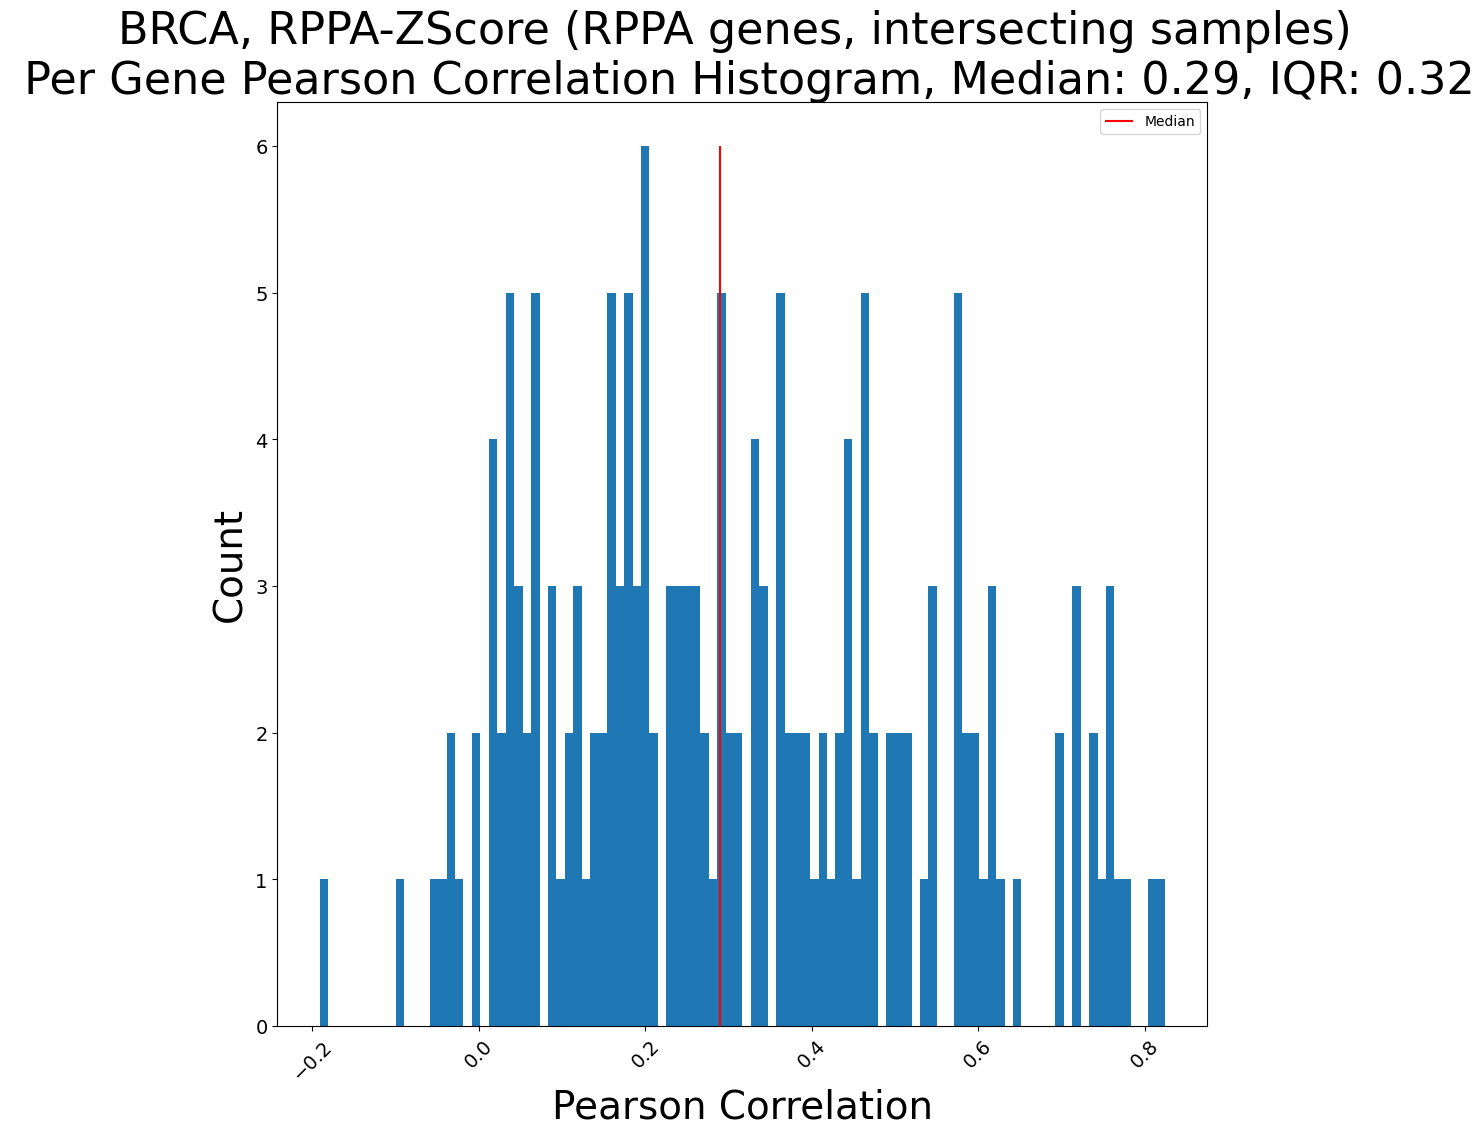

/var/folders/4s/5bktxlm15j156ybv0th415qh0000gn/T/ipykernel_63171/1562443999.py:52: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_1_values = pd.merge(sample_ids_df, df_1, how="left", on="sample_id")[columns].drop(columns=["sample_id"]).values
/var/folders/4s/5bktxlm15j156ybv0th415qh0000gn/T/ipykernel_63171/1562443999.py:53: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_2_values = pd.merge(sample_ids_df, df_2, how="left", on="sample_id")[columns].drop(columns=["sample_id"]).values


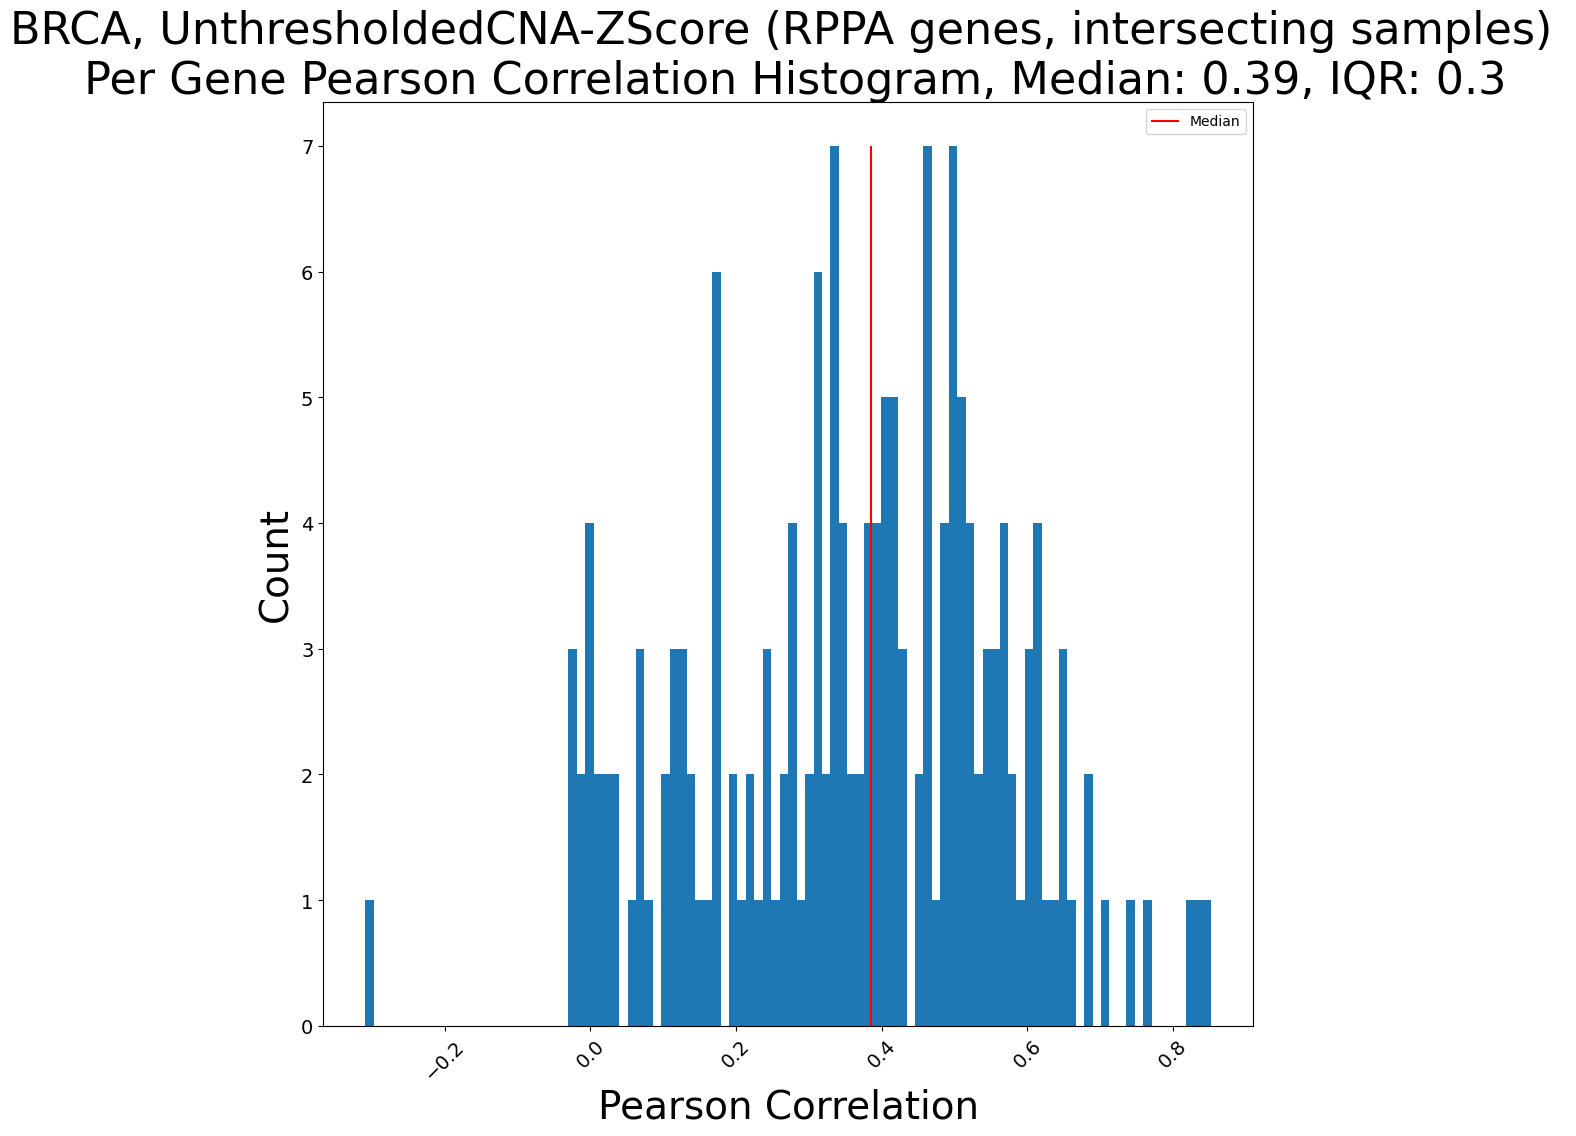

/var/folders/4s/5bktxlm15j156ybv0th415qh0000gn/T/ipykernel_63171/1562443999.py:71: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  grouped_values = pd.merge(sample_ids_df, grouped_df, how="left", on="sample_id")[columns].drop(columns=["sample_id"]).values.ravel()
/var/folders/4s/5bktxlm15j156ybv0th415qh0000gn/T/ipykernel_63171/1562443999.py:72: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  grouper_values = pd.merge(sample_ids_df, grouper_df, how="left", on="sample_id")[columns].drop(columns=["sample_id"]).values.ravel()


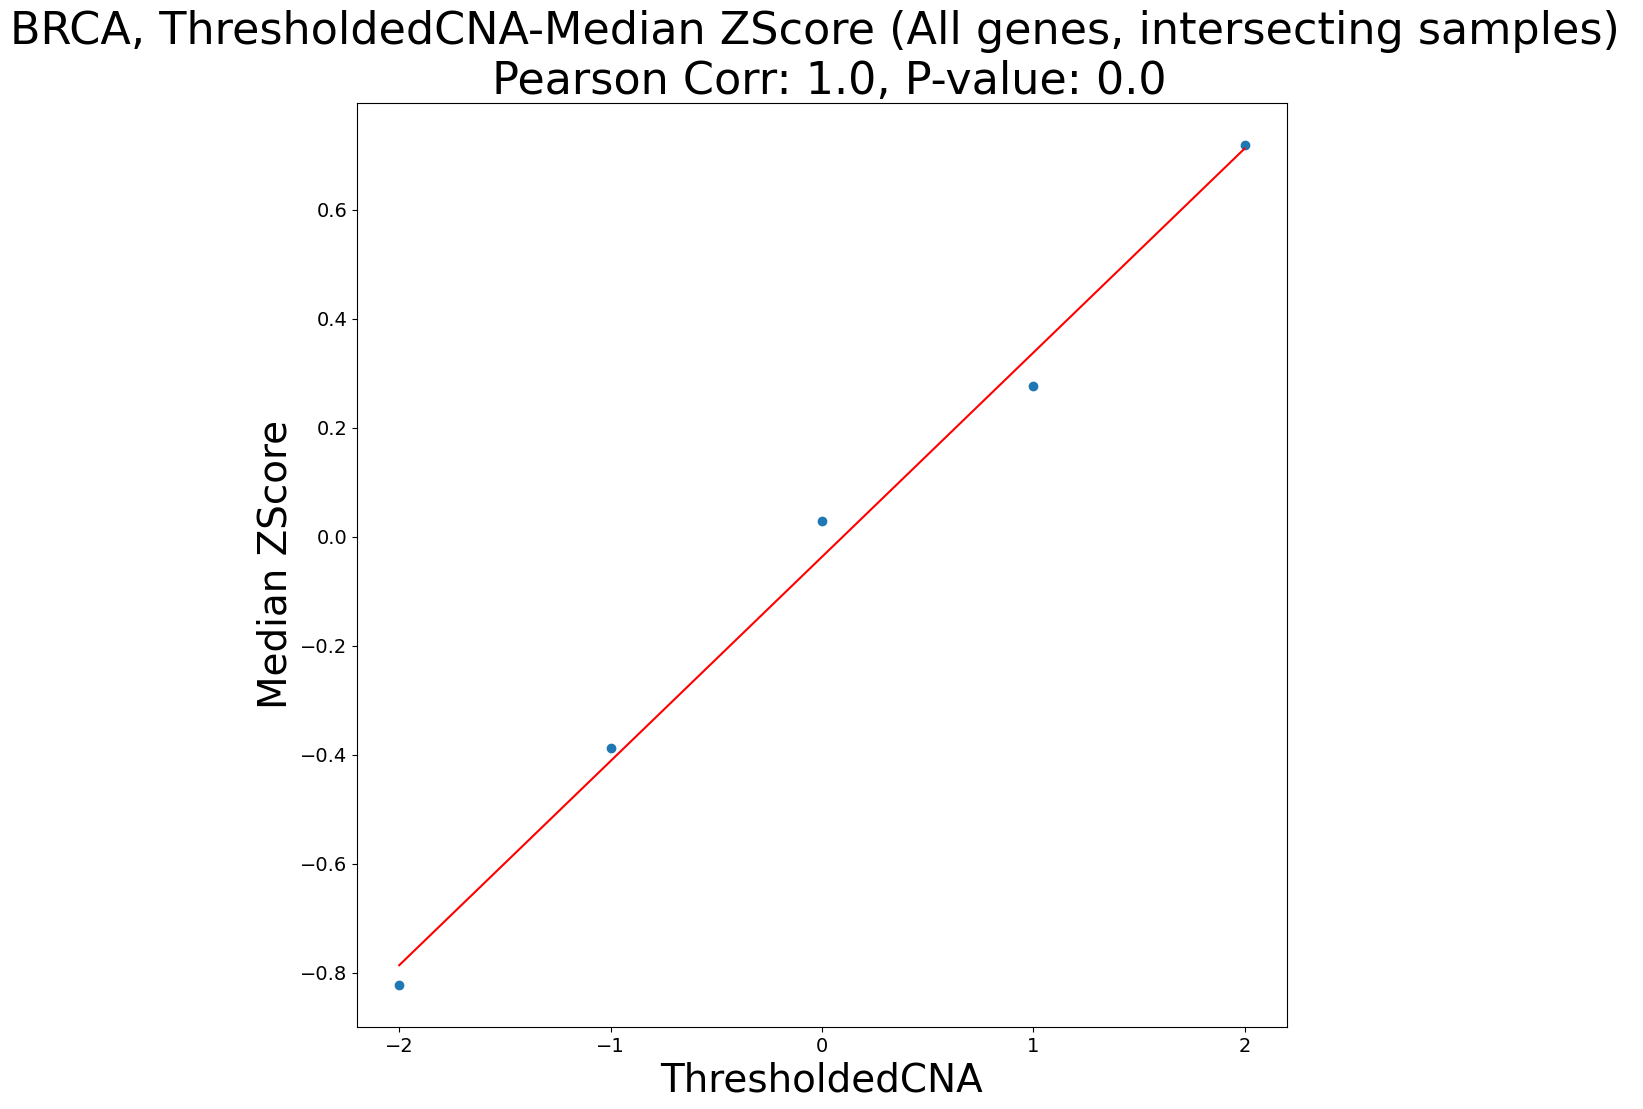

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../scripts/data_processing/")
from zscore import get_zscore_data
from typing import List
from scipy.stats import pearsonr
from numpy.polynomial.polynomial import polyfit


processed_data_dir = "../data/processed"

cancer_type_df = pd.read_csv(os.path.join(processed_data_dir, "cancer_type.tsv"), sep="\t")
brca_sample_ids = cancer_type_df[cancer_type_df["cancer_type"] == "brca"]["sample_id"].tolist()

gex_df = pd.read_csv(os.path.join(processed_data_dir, "gex.tsv"), sep="\t")
gex_df = gex_df[gex_df["sample_id"].isin(brca_sample_ids)]

gex_values = gex_df.drop(columns=["sample_id"])
gex_columns = gex_values.columns.tolist()
gex_values = gex_values.values
zscore_values = (gex_values - gex_values.mean(axis=0)) / (gex_values.std(axis=0) + 1e-10)
zscore_df = pd.DataFrame(data=np.hstack((gex_df[["sample_id"]].values, zscore_values)), columns=["sample_id"] + gex_columns)
del gex_df
del zscore_values
del gex_values

rppa_df = pd.read_csv(os.path.join(processed_data_dir, "rppa.tsv"), sep="\t")
rppa_df = rppa_df[rppa_df["sample_id"].isin(brca_sample_ids)]

unthresholded_cna_df = pd.read_csv(os.path.join(processed_data_dir, "unthresholded_cna.tsv"), sep="\t")
unthresholded_cna_df = unthresholded_cna_df[unthresholded_cna_df["sample_id"].isin(brca_sample_ids)]

thresholded_cna_df = pd.read_csv(os.path.join(processed_data_dir, "thresholded_cna.tsv"), sep="\t")
thresholded_cna_df = thresholded_cna_df[thresholded_cna_df["sample_id"].isin(brca_sample_ids)]

zscore_sample_ids = set(zscore_df["sample_id"].tolist())
rppa_sample_ids = set(rppa_df["sample_id"].tolist())
cna_sample_ids = set(unthresholded_cna_df["sample_id"].tolist())

zscore_rppa_intersecting_sample_ids_df = pd.DataFrame.from_dict({"sample_id": list(zscore_sample_ids.intersection(rppa_sample_ids))})
zscore_cna_intersecting_sample_ids_df = pd.DataFrame.from_dict({"sample_id": list(zscore_sample_ids.intersection(cna_sample_ids))})

zscore_rppa_intersecting_columns = set(zscore_df.columns.tolist()).intersection(rppa_df.columns.tolist())
zscore_cna_intersecting_columns = set(zscore_df.columns.tolist()).intersection(unthresholded_cna_df.columns.tolist())
zscore_rppa_cna_intersecting_columns = set(zscore_df.columns.tolist()).intersection(rppa_df.columns.tolist()).intersection(unthresholded_cna_df.columns.tolist())

def plot_per_gene_pearson_correlation_histogram(df_1: pd.DataFrame, df_2: pd.DataFrame, columns: List[str], sample_ids_df: pd.DataFrame, title: str) -> None:
    entrezgene_ids = df_1.drop(columns=["sample_id"]).columns.tolist()
    df_1_values = pd.merge(sample_ids_df, df_1, how="left", on="sample_id")[columns].drop(columns=["sample_id"]).values
    df_2_values = pd.merge(sample_ids_df, df_2, how="left", on="sample_id")[columns].drop(columns=["sample_id"]).values
    corrs = []
    plt.figure(figsize=(12, 12))
    for j in range(df_1_values.shape[1]):
        current_corr = pearsonr(df_1_values[:, j], df_2_values[:, j])[0]
        corrs.append(current_corr)
    n, _, _ = plt.hist(corrs, bins=100)
    plt.title(f"{title} \n Per Gene Pearson Correlation Histogram, Median: {np.round(np.nanmedian(corrs), 2)}, IQR: {np.round(np.nanpercentile(corrs, 75) - np.nanpercentile(corrs, 25), 2)}", fontsize=32)
    plt.vlines(x=np.nanmedian(corrs), ymin=0.0, ymax=np.max(n), color="red", label="Median")
    plt.xlabel("Pearson Correlation", fontsize=28)
    plt.ylabel("Count", fontsize=28)
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14, rotation=0)
    plt.legend()
    plt.show();


def plot_scatter_plot(grouped_df: pd.DataFrame, grouper_df: pd.DataFrame, sample_ids_df: pd.DataFrame, columns: List[str], title: str, xlabel: str, ylabel: str) -> None:
    grouped_values = pd.merge(sample_ids_df, grouped_df, how="left", on="sample_id")[columns].drop(columns=["sample_id"]).values.ravel()
    grouper_values = pd.merge(sample_ids_df, grouper_df, how="left", on="sample_id")[columns].drop(columns=["sample_id"]).values.ravel()
    merged_df = pd.DataFrame.from_dict({"grouped": grouped_values, "grouper": grouper_values})
    merged_df = merged_df.groupby("grouper").agg({"grouped": "median"}).reset_index(drop=False)
    pearson_corr, p_value = pearsonr(merged_df["grouper"].values.ravel(), merged_df["grouped"].values.ravel())
    plt.figure(figsize=(12, 12))
    b, m = polyfit(merged_df["grouper"].values, merged_df["grouped"].values, 1)
    plt.scatter(merged_df["grouper"].values.ravel(), merged_df["grouped"].values.ravel())
    plt.title(f"{title} \n Pearson Corr: {np.round(pearson_corr, 2)}, P-value: {np.round(p_value, 2)}", fontsize=32)
    plt.plot(merged_df["grouper"].values, b + m * merged_df["grouper"].values, '-', color="red")
    plt.xticks([-2, -1, 0, 1, 2], fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(xlabel, fontsize=28)
    plt.ylabel(ylabel, fontsize=28)
    plt.show();


plot_per_gene_pearson_correlation_histogram(df_1=zscore_df, df_2=unthresholded_cna_df, columns=zscore_cna_intersecting_columns, sample_ids_df=zscore_cna_intersecting_sample_ids_df, title="BRCA, UnthresholdedCNA-ZScore (All genes, intersecting samples)")
plot_per_gene_pearson_correlation_histogram(df_1=zscore_df, df_2=rppa_df, columns=zscore_rppa_intersecting_columns, sample_ids_df=zscore_rppa_intersecting_sample_ids_df, title="BRCA, RPPA-ZScore (RPPA genes, intersecting samples)")
plot_per_gene_pearson_correlation_histogram(df_1=zscore_df, df_2=unthresholded_cna_df, columns=zscore_rppa_cna_intersecting_columns, sample_ids_df=zscore_cna_intersecting_sample_ids_df, title="BRCA, UnthresholdedCNA-ZScore (RPPA genes, intersecting samples)")
plot_scatter_plot(grouped_df=zscore_df, grouper_df=thresholded_cna_df, sample_ids_df=zscore_cna_intersecting_sample_ids_df, columns=zscore_cna_intersecting_columns, title="BRCA, ThresholdedCNA-Median ZScore (All genes, intersecting samples)", xlabel="ThresholdedCNA", ylabel="Median ZScore")

